# 1.  Data Description


income : Income of the customer

age : Age of the customer

experience : Work experience of the customer in years

profession : Profession of the customer

married : Whether married or single

house_ownership : House ownership status of the customer

car_ownership : Whether the customer owns a car or not

risk_flag : Whether the customer defaulted on the loan or not

currentjobyears : Years of experience in the current job of customer

currenthouseyears : Number of years in the current residence

city : City of residence

state : State of residence

# 1.2  LIBRARIES

In [1]:
# //////////// IMPORTING LIBRARIES //////
####### To make use of the functions in a module,we have to import the module with an import statement..########

import pandas as pd
import numpy as np
import os
import re
import statistics
import math
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

import warnings
warnings.filterwarnings('ignore')

## 2. EDA

In [2]:
df = pd.read_csv('Loan_pred.csv')
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


### Problem Statement: 

### Feature Engineering: 

#### Feature Selection 

In [3]:
import pandas as pd
df = pd.read_csv('Loan_pred.csv')
df

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0
251996,251997,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0
251997,251998,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0
251998,251999,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,0,10,0


In [4]:
import pandas as pd
df.rename(columns={'Married/Single':'marital_status'},inplace=True)

In [5]:
df

,Id,Income,Age,Experience,marital_status,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0
251996,251997,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0
251997,251998,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0
251998,251999,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,0,10,0


<AxesSubplot:xlabel='STATE', ylabel='count'>

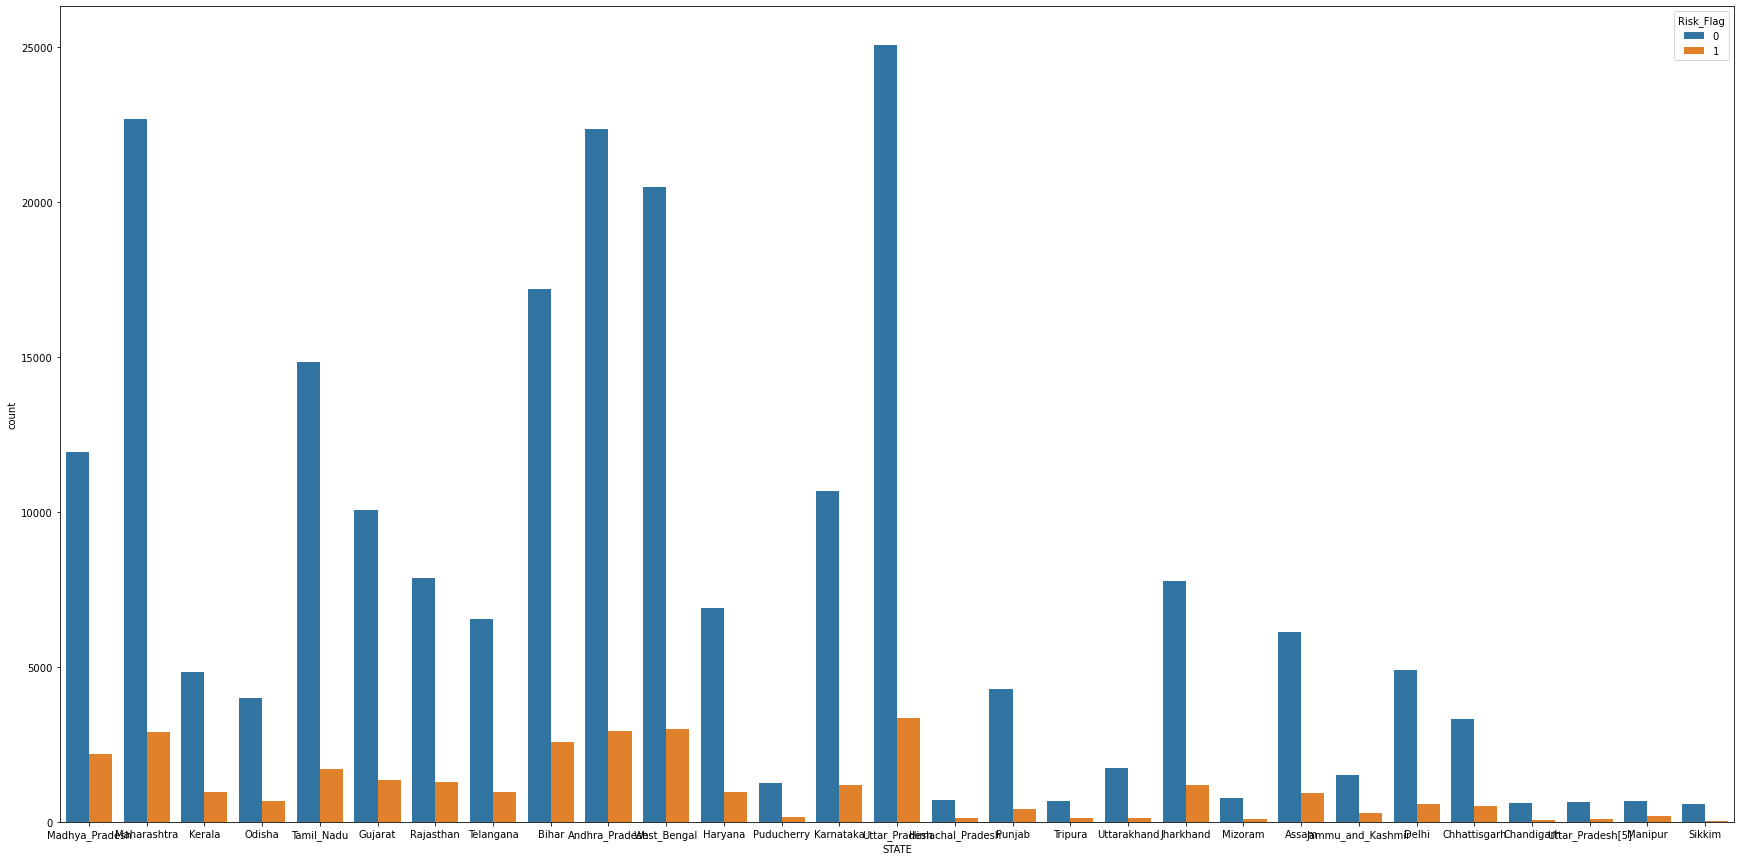

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(30, 15))
sns.countplot(x = 'STATE', data =df, hue='Risk_Flag',ax=ax)

In [7]:
df['STATE'].replace({'Uttar_Pradesh[5]':'Uttar_Pradesh'},inplace=True)

In [8]:
df['STATE'].value_counts()

Uttar_Pradesh        29143
Maharashtra          25562
Andhra_Pradesh       25297
West_Bengal          23483
Bihar                19780
Tamil_Nadu           16537
Madhya_Pradesh       14122
Karnataka            11855
Gujarat              11408
Rajasthan             9174
Jharkhand             8965
Haryana               7890
Telangana             7524
Assam                 7062
Kerala                5805
Delhi                 5490
Punjab                4720
Odisha                4658
Chhattisgarh          3834
Uttarakhand           1874
Jammu_and_Kashmir     1780
Puducherry            1433
Manipur                849
Mizoram                849
Himachal_Pradesh       833
Tripura                809
Chandigarh             656
Sikkim                 608
Name: STATE, dtype: int64

In [9]:
vals_to_replace = {'Uttar_Pradesh':1, 'Maharashtra':1, 'Andhra_Pradesh':1,'West_Bengal':1,'Bihar':1,'Tamil_Nadu':1,
                   'Madhya_Pradesh':1,'Karnataka':1,'Gujarat':1,'Rajasthan':2,'Jharkhand':2,'Haryana':2,'Telangana':2,
                   'Jammu_and_Kashmir':2,'Assam':2,'Kerala':2,'Delhi':2,'Punjab':2,'Odisha':2,'Chhattisgarh':2,'Uttarakhand':2,'Puducherry':2,
                   'Mizoram':3,'Manipur':3,'Himachal_Pradesh':3,'Tripura':3,'Chandigarh':3,'Sikkim':3}
df['STATE'] = df['STATE'].map(vals_to_replace)
df

,Id,Income,Age,Experience,marital_status,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,1,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,1,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,2,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,2,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],1,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,1,6,11,0
251996,251997,2843572,26,10,single,rented,no,Army_officer,Rewa,1,6,11,0
251997,251998,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,1,7,12,0
251998,251999,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,2,0,10,0


In [10]:
df.drop(['Id','CITY'],axis=1,inplace=True)     # Dropping unnecessary features

In [11]:
df

,Income,Age,Experience,marital_status,House_Ownership,Car_Ownership,Profession,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,single,rented,no,Mechanical_engineer,1,3,13,0
1,7574516,40,10,single,rented,no,Software_Developer,1,9,13,0
2,3991815,66,4,married,rented,no,Technical_writer,2,4,10,0
3,6256451,41,2,single,rented,yes,Software_Developer,2,2,12,1
4,5768871,47,11,single,rented,no,Civil_servant,1,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...
251995,8154883,43,13,single,rented,no,Surgeon,1,6,11,0
251996,2843572,26,10,single,rented,no,Army_officer,1,6,11,0
251997,4522448,46,7,single,rented,no,Design_Engineer,1,7,12,0
251998,6507128,45,0,single,rented,no,Graphic_Designer,2,0,10,0


In [12]:
df['STATE'].isnull().sum()

0

#### Encoding: 

##### Features - Married/Single, House_ownership, Car_ownership

In [13]:
# In this features to convert string values to int we use encoding technique.
# Here we can use simple encoding technique ---> Replacing values
class Encode():
    
    def Unique(self):
        print(df['marital_status'].unique())
        print(df['House_Ownership'].unique())
        print(df['Car_Ownership'].unique())

    def Encode_Feature(self):
        df['marital_status'].replace({'married':0,'single':1},inplace=True)
        df['House_Ownership'].replace({'rented':0,'norent_noown':1,'owned':2},inplace=True)
        df['Car_Ownership'].replace({'no':0,'yes':1},inplace=True)
    
    def display_update(self):
        display(df)

enco = Encode()
enco.Unique()
enco.Encode_Feature()
enco.display_update()

['single' 'married']
['rented' 'norent_noown' 'owned']
['no' 'yes']


,Income,Age,Experience,marital_status,House_Ownership,Car_Ownership,Profession,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,1,0,0,Mechanical_engineer,1,3,13,0
1,7574516,40,10,1,0,0,Software_Developer,1,9,13,0
2,3991815,66,4,0,0,0,Technical_writer,2,4,10,0
3,6256451,41,2,1,0,1,Software_Developer,2,2,12,1
4,5768871,47,11,1,0,0,Civil_servant,1,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...
251995,8154883,43,13,1,0,0,Surgeon,1,6,11,0
251996,2843572,26,10,1,0,0,Army_officer,1,6,11,0
251997,4522448,46,7,1,0,0,Design_Engineer,1,7,12,0
251998,6507128,45,0,1,0,0,Graphic_Designer,2,0,10,0


##### Feature - Profession 

In [14]:
df['Profession'].unique()

array(['Mechanical_engineer', 'Software_Developer', 'Technical_writer',
       'Civil_servant', 'Librarian', 'Economist', 'Flight_attendant',
       'Architect', 'Designer', 'Physician', 'Financial_Analyst',
       'Air_traffic_controller', 'Politician', 'Police_officer', 'Artist',
       'Surveyor', 'Design_Engineer', 'Chemical_engineer',
       'Hotel_Manager', 'Dentist', 'Comedian', 'Biomedical_Engineer',
       'Graphic_Designer', 'Computer_hardware_engineer',
       'Petroleum_Engineer', 'Secretary', 'Computer_operator',
       'Chartered_Accountant', 'Technician', 'Microbiologist',
       'Fashion_Designer', 'Aviator', 'Psychologist', 'Magistrate',
       'Lawyer', 'Firefighter', 'Engineer', 'Official', 'Analyst',
       'Geologist', 'Drafter', 'Statistician', 'Web_designer',
       'Consultant', 'Chef', 'Army_officer', 'Surgeon', 'Scientist',
       'Civil_engineer', 'Industrial_Engineer', 'Technology_specialist'],
      dtype=object)

In [15]:
# There are multiple unique values are present inside profession column hence we apply label encoding here.
from sklearn.preprocessing import LabelEncoder
lab_enco = LabelEncoder()
df['Profession'] = lab_enco.fit_transform(df['Profession'])

In [16]:
df

,Income,Age,Experience,marital_status,House_Ownership,Car_Ownership,Profession,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,1,0,0,33,1,3,13,0
1,7574516,40,10,1,0,0,43,1,9,13,0
2,3991815,66,4,0,0,0,47,2,4,10,0
3,6256451,41,2,1,0,1,43,2,2,12,1
4,5768871,47,11,1,0,0,11,1,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...
251995,8154883,43,13,1,0,0,45,1,6,11,0
251996,2843572,26,10,1,0,0,3,1,6,11,0
251997,4522448,46,7,1,0,0,17,1,7,12,0
251998,6507128,45,0,1,0,0,27,2,0,10,0


In [17]:
df.info()                                # Checking info of our data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   Income             252000 non-null  int64
 1   Age                252000 non-null  int64
 2   Experience         252000 non-null  int64
 3   marital_status     252000 non-null  int64
 4   House_Ownership    252000 non-null  int64
 5   Car_Ownership      252000 non-null  int64
 6   Profession         252000 non-null  int32
 7   STATE              252000 non-null  int64
 8   CURRENT_JOB_YRS    252000 non-null  int64
 9   CURRENT_HOUSE_YRS  252000 non-null  int64
 10  Risk_Flag          252000 non-null  int64
dtypes: int32(1), int64(10)
memory usage: 20.2 MB


In [18]:
df.describe()

,Income,Age,Experience,marital_status,House_Ownership,Car_Ownership,Profession,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,4.997117e+06,49.954071,10.084437,0.897905,0.131032,0.301587,25.276746,1.315147,6.333877,11.997794,0.123000
std,2.878311e+06,17.063855,6.002590,0.302774,0.465174,0.458948,14.728537,0.502364,3.647053,1.399037,0.328438
min,1.031000e+04,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,10.000000,0.000000
25%,2.503015e+06,35.000000,5.000000,1.000000,0.000000,0.000000,13.000000,1.000000,3.000000,11.000000,0.000000
50%,5.000694e+06,50.000000,10.000000,1.000000,0.000000,0.000000,26.000000,1.000000,6.000000,12.000000,0.000000
75%,7.477502e+06,65.000000,15.000000,1.000000,0.000000,1.000000,38.000000,2.000000,9.000000,13.000000,0.000000
max,9.999938e+06,79.000000,20.000000,1.000000,2.000000,1.000000,50.000000,3.000000,14.000000,14.000000,1.000000


#### Feature Scaling 

In [19]:
# spliting the data
x = df.drop('Risk_Flag',axis=1)
y = df['Risk_Flag']

In [20]:
# To scale down all the features between 0 - 1.
# Here we use min-max scaler

from sklearn.preprocessing import MinMaxScaler
mx = MinMaxScaler()
x_scaled = mx.fit_transform(x)
x_normalized = pd.DataFrame(x_scaled,columns=x.columns)
x_normalized

,Income,Age,Experience,marital_status,House_Ownership,Car_Ownership,Profession,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
0,0.129487,0.034483,0.15,1.0,0.0,0.0,0.66,0.0,0.214286,0.75
1,0.757206,0.327586,0.50,1.0,0.0,0.0,0.86,0.0,0.642857,0.75
2,0.398564,0.775862,0.20,0.0,0.0,0.0,0.94,0.5,0.285714,0.00
3,0.625263,0.344828,0.10,1.0,0.0,1.0,0.86,0.5,0.142857,0.50
4,0.576454,0.448276,0.55,1.0,0.0,0.0,0.22,0.0,0.214286,1.00
...,...,...,...,...,...,...,...,...,...,...
251995,0.815303,0.379310,0.65,1.0,0.0,0.0,0.90,0.0,0.428571,0.25
251996,0.283620,0.086207,0.50,1.0,0.0,0.0,0.06,0.0,0.428571,0.25
251997,0.451682,0.431034,0.35,1.0,0.0,0.0,0.34,0.0,0.500000,0.50
251998,0.650356,0.413793,0.00,1.0,0.0,0.0,0.54,0.5,0.000000,0.00


##### Outliers Treatment

<AxesSubplot:>

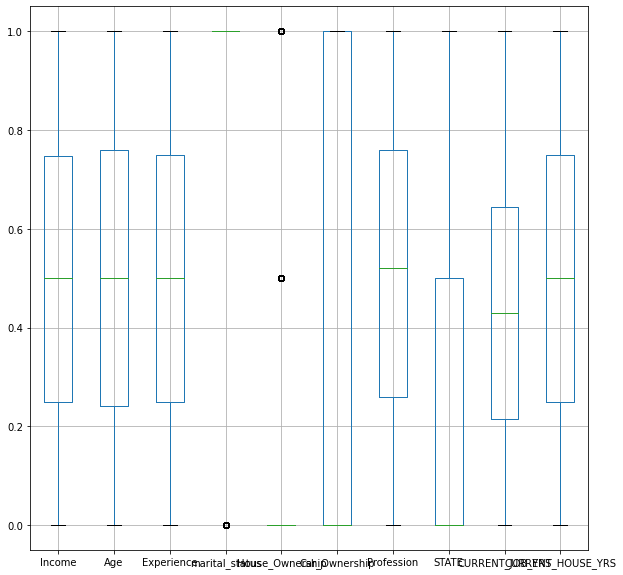

In [21]:
# Plotting boxplot to check whether outliers are present or not.
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
x_normalized.boxplot()

# From boxplot there are no outliers present in the dataset

#### Handling Imbalance Data 

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   Income             252000 non-null  int64
 1   Age                252000 non-null  int64
 2   Experience         252000 non-null  int64
 3   marital_status     252000 non-null  int64
 4   House_Ownership    252000 non-null  int64
 5   Car_Ownership      252000 non-null  int64
 6   Profession         252000 non-null  int32
 7   STATE              252000 non-null  int64
 8   CURRENT_JOB_YRS    252000 non-null  int64
 9   CURRENT_HOUSE_YRS  252000 non-null  int64
 10  Risk_Flag          252000 non-null  int64
dtypes: int32(1), int64(10)
memory usage: 20.2 MB


<AxesSubplot:xlabel='Risk_Flag', ylabel='count'>

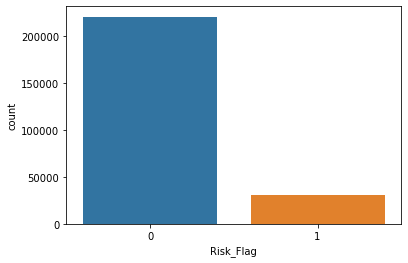

In [23]:
import seaborn as sns
sns.countplot(x=df['Risk_Flag'])

#####  SMOTE

In [24]:
from imblearn.over_sampling import SMOTE

# over = SMOTE(sampling_strategy=0.1)
oversample = SMOTE(random_state=2)
x_normalized, y = oversample.fit_resample(x_normalized, y)

In [25]:
y.value_counts()

0    221004
1    221004
Name: Risk_Flag, dtype: int64

<AxesSubplot:xlabel='Risk_Flag', ylabel='count'>

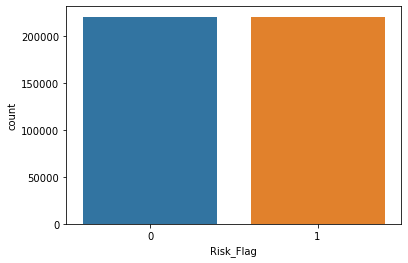

In [26]:
sns.countplot(x=y)

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_normalized,y,test_size=0.2,random_state=23)

#### Selection of Algorithm 

In [28]:
df.columns

Index(['Income', 'Age', 'Experience', 'marital_status', 'House_Ownership',
       'Car_Ownership', 'Profession', 'STATE', 'CURRENT_JOB_YRS',
       'CURRENT_HOUSE_YRS', 'Risk_Flag'],
      dtype='object')

In [29]:
df1 = df.head(10)

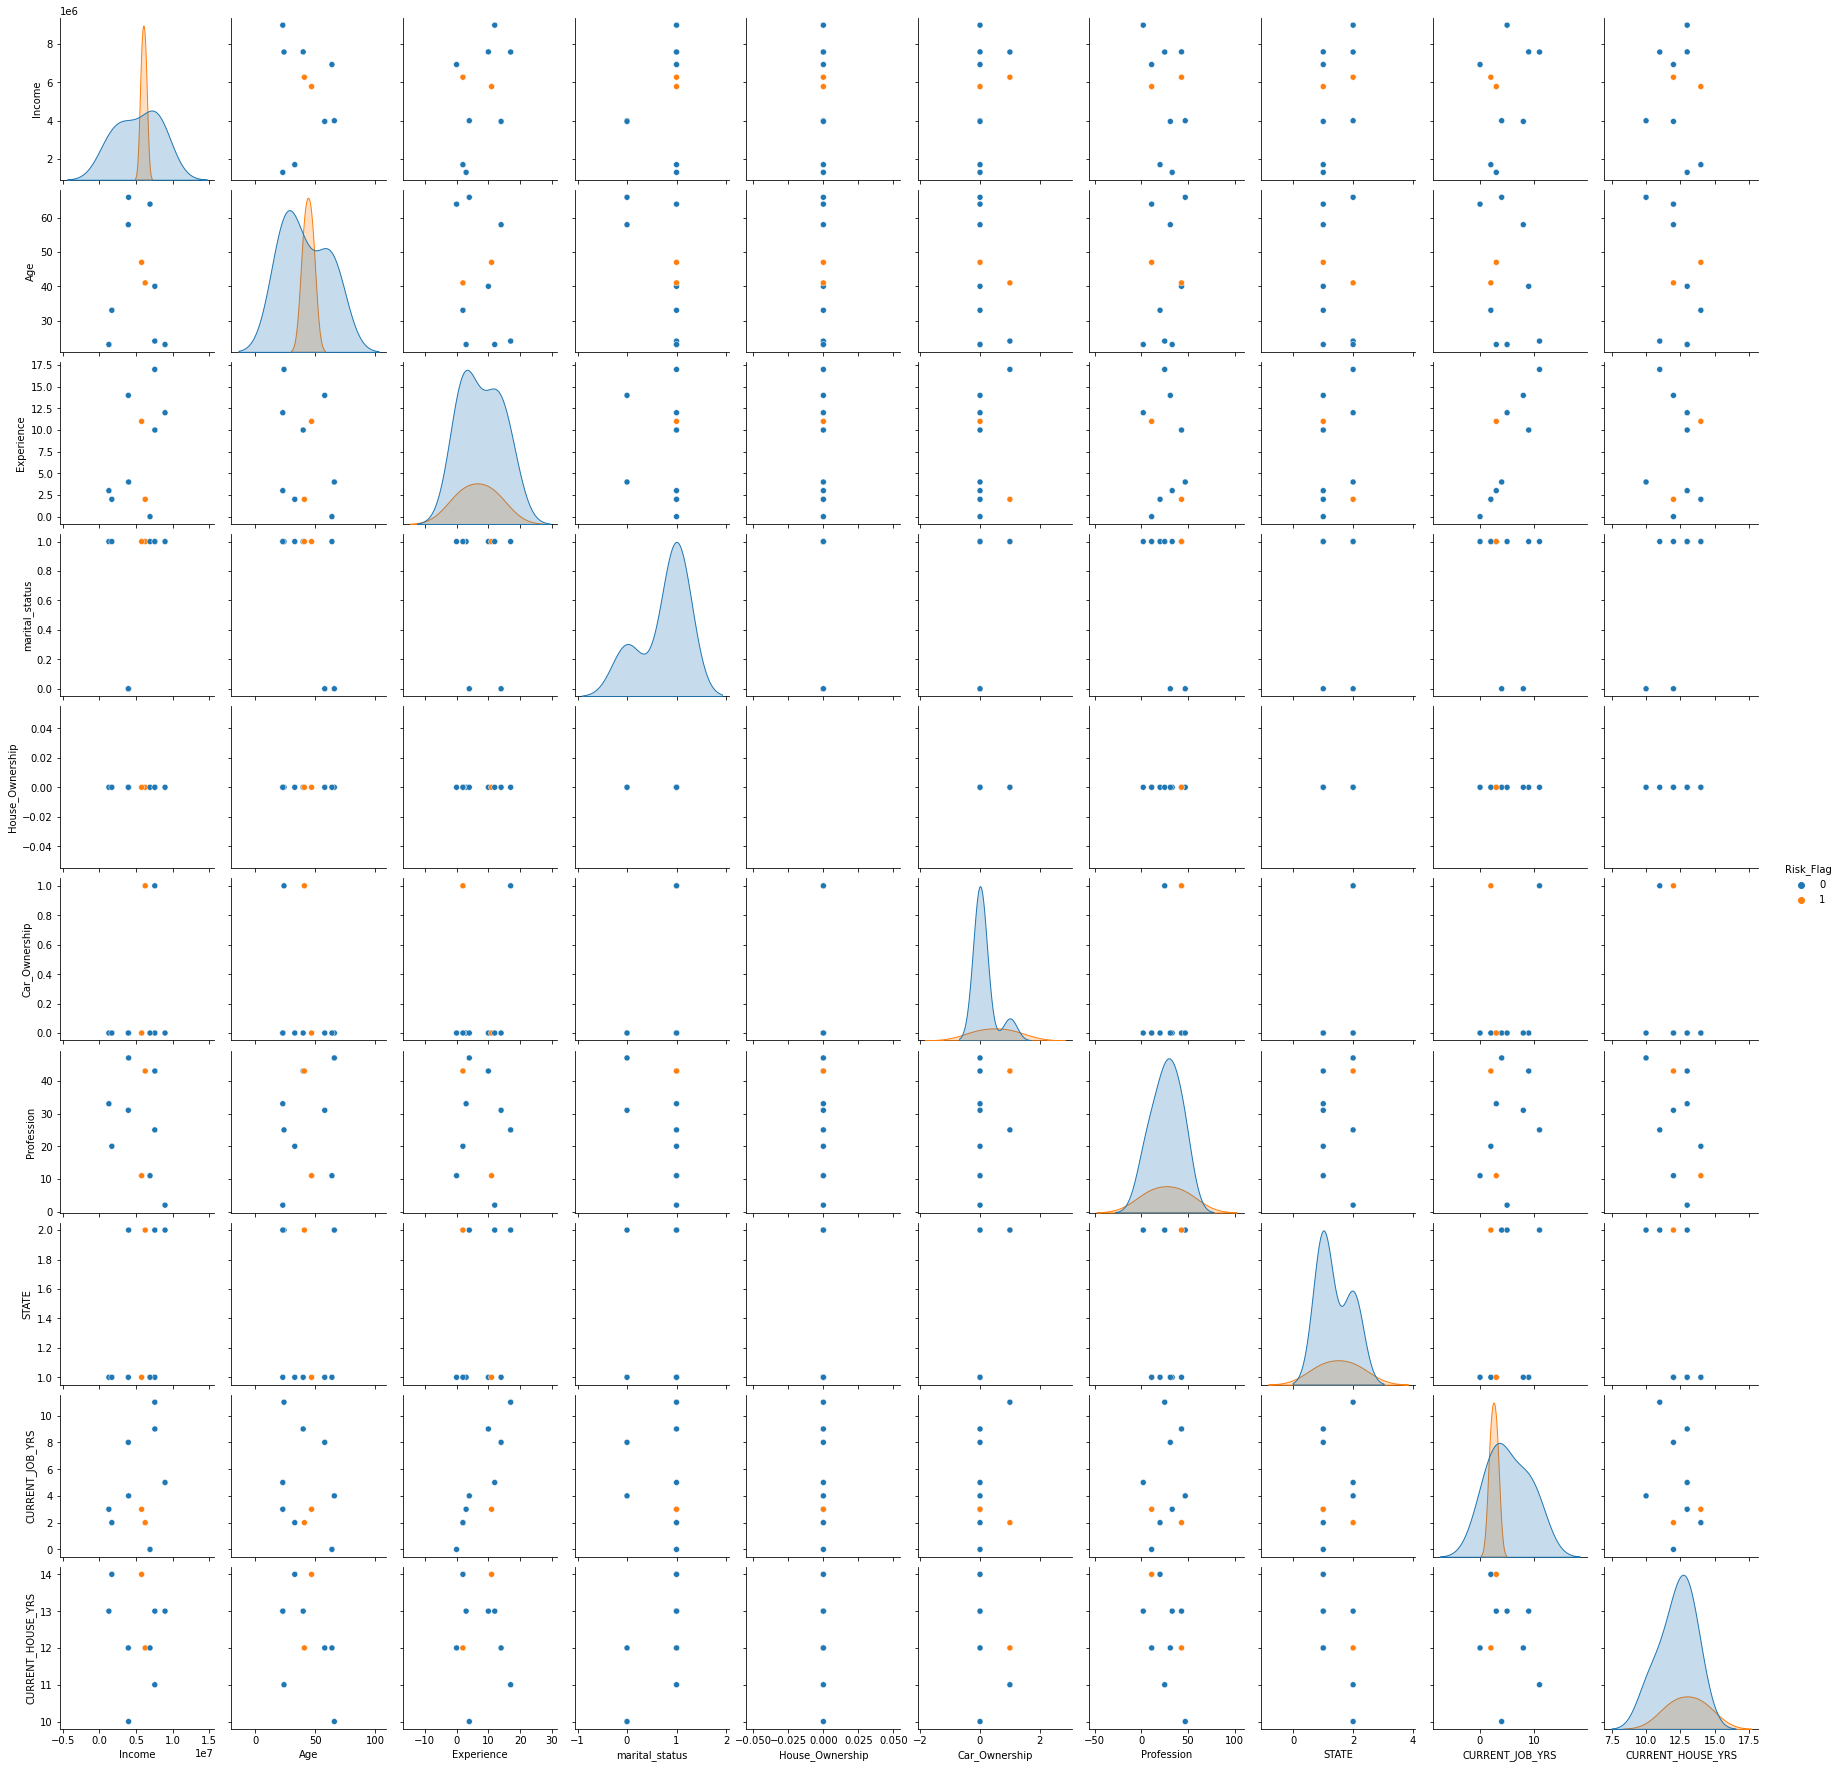

In [30]:
sns.pairplot(df1,hue='Risk_Flag')

#### Training Model

In [31]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score,roc_curve, plot_confusion_matrix
import warnings
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
warnings.filterwarnings('ignore')

In [32]:
Decision_model=DecisionTreeClassifier()
Decision_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [33]:
#testing prediction of y
y_pred=Decision_model.predict(x_test)

In [34]:
#training prediction of y
y_pred_train=Decision_model.predict(x_train)

In [35]:
accuracy_score(y_test,y_pred)

0.9182823918010905

In [36]:
accuracy_score(y_train,y_pred_train)

0.9574215369648705

In [37]:
confusion_matrix(y_test,y_pred)

array([[38605,  5623],
       [ 1601, 42573]], dtype=int64)

In [38]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.87      0.91     44228
           1       0.88      0.96      0.92     44174

    accuracy                           0.92     88402
   macro avg       0.92      0.92      0.92     88402
weighted avg       0.92      0.92      0.92     88402



#### Hyperparameter Tuning 

##### Grid searchCV

In [39]:
hyperparameters = {'criterion':["entropy",'Gini'],
                    'max_depth':np.arange(4,25),
                  'min_samples_leaf':np.arange(2,4),
                  'min_samples_split':np.arange(2,4)}
gscv_dt_model=GridSearchCV(Decision_model,hyperparameters,cv=3)
gscv_dt_model

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'Gini'],
                         'max_depth': array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
       21, 22, 23, 24]),
                         'min_samples_leaf': array([2, 3]),
                         'min_samples_split': array([2, 3])})

In [40]:
gscv_dt_model.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'Gini'],
                         'max_depth': array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
       21, 22, 23, 24]),
                         'min_samples_leaf': array([2, 3]),
                         'min_samples_split': array([2, 3])})

In [41]:
gscv_dt_model.best_params_

{'criterion': 'entropy',
 'max_depth': 24,
 'min_samples_leaf': 2,
 'min_samples_split': 3}

In [42]:
y_pred_gscv=gscv_dt_model.predict(x_test)
accuracy_score(y_test,y_pred_gscv)

0.8520282346553245

In [43]:
y_pred_train_gscv=gscv_dt_model.predict(x_train)
accuracy_score(y_train,y_pred_train_gscv)

0.8707233474545115

# Randomized searchcv

In [44]:
hyperparameters = {'criterion':["entropy",'Gini'],
                    'max_depth':np.arange(4,100),
                  'min_samples_leaf':np.arange(2,20),
                  'min_samples_split':np.arange(2,10)}
rscv_dt_model=RandomizedSearchCV(Decision_model,hyperparameters)
rscv_dt_model

RandomizedSearchCV(estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['entropy', 'Gini'],
                                        'max_depth': array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
       21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,
       38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54,
       55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
       72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88,
       89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
                                        'min_samples_leaf': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                                        'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9])})

In [45]:
rscv_dt_model.fit(x_train,y_train)

RandomizedSearchCV(estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['entropy', 'Gini'],
                                        'max_depth': array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
       21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,
       38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54,
       55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
       72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88,
       89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
                                        'min_samples_leaf': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                                        'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9])})

In [46]:
rscv_dt_model.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=41, min_samples_leaf=5,
                       min_samples_split=3)

In [47]:
y_pred1=rscv_dt_model.predict(x_test)
accuracy_score(y_test,y_pred1)

0.9145041967376304

In [48]:
y_pred_train_rscv=rscv_dt_model.predict(x_train)
accuracy_score(y_train,y_pred_train_rscv)

0.9361492734851784

In [49]:
rscv_model_final = rscv_dt_model.fit(x_normalized,y) ### COMPLETE MODEL FIT

In [50]:
y_pred_final=rscv_model_final.predict(x_normalized)
confusion_matrix(y,y_pred_final)

array([[193880,  27124],
       [  8893, 212111]], dtype=int64)

In [51]:
accuracy_score(y,y_pred_final)

0.9185150495013665

In [52]:
import pickle
pickle.dump(rscv_dt_model,open('DT_Final.pickle','wb'))
